In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re
from matplotlib import dates

pd.options.display.float_format = '{:.5f}'.format
data = "/Users/luci031/Desktop/Coding/g_auction"

In [2]:
# matplotlib 폰트설정
plt.rc('font', family='AppleGothic') # For MacOS
# plt.rc('font', family='NanumGothic') # For Windows
print(plt.rcParams['font.family'])

%matplotlib inline
# 브라우저에서 바로 이미지를 그린다.

plt.rcParams['axes.unicode_minus'] = False

['AppleGothic']


In [3]:
# 보기 옵션
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [4]:
df = pd.read_parquet("/Users/luci031/Desktop/Coding/g_auction/data_ingredients/auction_total3.parquet")
df_org = pd.read_csv("/Users/luci031/Desktop/Coding/g_auction/data_origin/auction_202002.csv",encoding='euc_kr')

In [86]:
df['year'] = df['reg_date'].dt.year
df['month'] = df['reg_date'].dt.month
df['week'] = df['reg_date'].dt.week
df['day'] = df['reg_date'].dt.day

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2123/4146586622.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] = df['reg_date'].dt.week


# 데이터 분포

In [6]:
df['prd'].value_counts()

고추      388681
버섯      295218
오이      242301
토마토     205550
호박      198434
         ...  
옥돔           1
피마자          1
자리돔          1
상황버섯         1
가재           1
Name: prd, Length: 328, dtype: int64

In [7]:
df.describe()

,class,scale,price,price_kg,year,month,week
count,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000,4659956.00000
mean,1.82487,61.35309,137587.94783,3536.71542,2020.27419,7.07274,28.89063
std,1.85840,1433.65485,988615.41355,8202.81625,1.33979,3.21946,14.09216
min,1.00000,0.01000,500.00000,0.08000,2018.00000,1.00000,1.00000
25%,1.00000,6.00000,12000.00000,1250.00000,2019.00000,4.00000,17.00000
50%,1.00000,15.00000,31800.00000,2265.00000,2020.00000,7.00000,30.00000
75%,2.00000,40.00000,94000.00000,4062.50000,2021.00000,10.00000,41.00000
max,9.00000,465138.00000,247011400.00000,7757360.00000,2022.00000,12.00000,53.00000


# 품목별 가격 분포

## 함수 생성

In [8]:
# 거래량, 거래 가격, 평균 kg 당 가격, 판매 등급
def prd_info(prd,nums1,nums2):
        # matplotlib 폰트설정
    plt.rc('font', family='AppleGothic') # For MacOS
    # plt.rc('font', family='NanumGothic') # For Windows
    print(plt.rcParams['font.family'])

    %matplotlib inline
    # 브라우저에서 바로 이미지를 그린다.

    plt.rcParams['axes.unicode_minus'] = False

    a = df[df['prd']==prd].groupby('reg_date').sum().reset_index()[['reg_date','scale','price']]
    b = df[df['prd']==prd].groupby('reg_date').mean().reset_index()[['reg_date','class','price_kg']]
    c = a.merge(b)
    c = c.rename(columns= {'scale':'total_scale','price':'total_price','class':'avg_class','price_kg':'avg_price_kg'})

    plt.figure(figsize=(24,18),facecolor="white")
    plt.subplot(4,1,1)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래량 (kg) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_scale'])
    plt.fill_between(c['reg_date'],c['total_scale'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['total_scale'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))


    plt.subplot(4,1,2)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 총 거래 가격(원) (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['total_price'])
    plt.fill_between(c['reg_date'],c['total_price'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['total_price'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.subplot(4,1,3)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 kg 당 가격 (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['avg_price_kg'])
    plt.fill_between(c['reg_date'],c['avg_price_kg'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(0,max(c['avg_price_kg'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.subplot(4,1,4)
    plt.rc('font', size=13)
    plt.rc('ytick', labelsize=10) 
    plt.title(f'일간 {prd} 평균 판매 등급 (제철: {nums1}~{nums2}월)')
    aaa = plt.plot(c['reg_date'],c['avg_class'])
    plt.fill_between(c['reg_date'],c['avg_class'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
    plt.ylim(1,max(c['avg_class'])*1.1)
    ax = plt.gca()
    ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

    plt.show()

## 비교를 위한 품목 선정
- 가장 거래량이 많은 단일 품목 5개
- 김장철 핵심 재료 5개

In [87]:
# 거래량 조회
df.groupby('prd').sum().sort_values('scale',ascending=False).head(10)

,class,scale,price,price_kg,year,month,week,day
prd,,,,,,,,
무,99255,92702512.70000,54261901149,90520034.91000,147891856,548579,2251837,1168194
오이,462224,21225254.55000,35924500939,357835150.04000,488525116,1696704,6927820,3852161
버섯,581884,15612918.03000,90824246581,1164741224.41000,596416494,2040531,8314234,4726633
고추,629501,14060274.33000,49506144986,1255590121.79000,784419170,2912849,11948394,6198117
호박,411067,9633072.61000,14566897178,256117882.35000,398776356,1477696,6059909,3153150
참외,77379,7357757.50000,21435678288,59167541.17000,47558079,135645,545947,369932
감자,232336,7221258.54000,7838353648,82673385.74000,180655826,603028,2459697,1426292
사과,129690,6890523.37000,17609855260,205318633.31000,169255891,634027,2607557,1328984
복숭아,252657,6236733.80000,17947112650,396792517.77000,245183727,918519,3765022,1911483


- 버섯은 품목 종류가 다양하므로 제외
- 김장 품목들은 따로 작성
- TOP 5 항목
  - 오이,고추,호박,참외,감자
- 김장 품목
  - 마늘,무,배추,열무,쪽파,총각무

## 탐색

### 이상치 제거

In [78]:
# 분포 함수 선언
def dist(df,prd,column):
    fig, ax = plt.subplots(ncols=2, figsize=(12,6))
    display('information')
    display(df[df['prd']==prd][column].describe())
    sns.set_theme(style='whitegrid')
    plt.ticklabel_format(style='plain', axis='y')
    sns.violinplot(y=df[df['prd']==prd][column],fmt='g', ax=ax[0])
    sns.boxplot(y=df[df['prd']==prd][column], ax=ax[1])

In [76]:
prd = '토마토'

'information'

count    205550.00000
mean       2770.89825
std        3528.17161
min          55.11000
25%        1500.00000
50%        2333.33000
75%        3566.67000
max     1002083.33000
Name: price_kg, dtype: float64

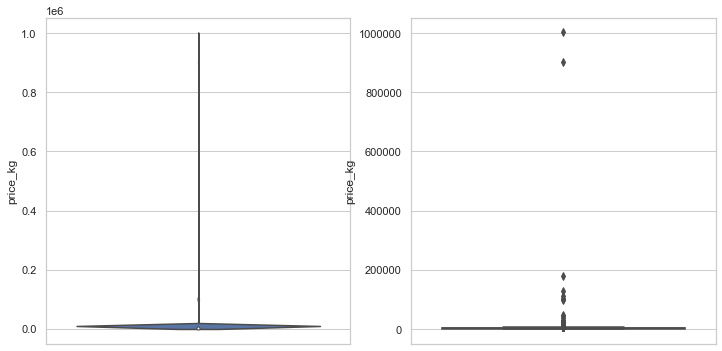

In [79]:
# 분포 확인
dist(df,prd,'price_kg')

In [82]:
# 이상치 확인 및 제거
price1 = 100
price2 = 20000
flag = True
display(df[(df['prd']==prd)&(df['price_kg']<price1)])
display(df[(df['prd']==prd)&(df['price_kg']>price2)].sort_values('price_kg'))

if flag:
    df.drop(df[(df['prd']==prd)&(df['price_kg']<price1)].index,inplace=True)
    df.drop(df[(df['prd']==prd)&(df['price_kg']>price2)].index,inplace=True)

,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week


,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week
4049499,전남,함평,토마토,normal,2019-11-25,1,45.00000,1027000,22822.22000,2019,11,48
1577136,강원,인제,토마토,normal,2018-10-22,9,35.00000,824000,23542.86000,2018,10,43
4314563,인천,강화,토마토,normal,2019-12-03,1,30.00000,748000,24933.33000,2019,12,49
295255,경기,이천,토마토,normal,2020-06-10,1,20.00000,520500,26025.00000,2020,6,24
1049837,전북,남원,토마토,normal,2020-06-16,1,4.00000,105000,26250.00000,2020,6,25
3693120,인천,강화,토마토,normal,2021-07-09,4,40.00000,1063000,26575.00000,2021,7,27
3308047,충남,예산,토마토,normal,2022-10-10,1,24.00000,669600,27900.00000,2022,10,41
4217076,강원,미상,토마토,normal,2019-06-12,2,40.00000,1537115,38427.88000,2019,6,24
2921281,부산,부산,토마토,good_prd,2020-02-22,1,25.00000,1065500,42620.00000,2020,2,8
4392447,부산,부산,토마토,normal,2020-05-26,1,27.50000,1292500,47000.00000,2020,5,22


In [18]:
#dist(df[(df['prd']=='마늘') & (df['city']=='고흥')],'마늘','price_kg')

In [140]:
# display(df[(df['prd']==prd)&(df['price_kg']>10000)].sort_values('price_kg'))

In [85]:
df[df['prd']=='']

,state,city,prd,eco,reg_date,class,scale,price,price_kg,year,month,week
0,경남,거제,가리비,normal,2018-10-11,3,10.00000,19000,1900.00000,2018,10,41
1,경남,거제,가리비,normal,2018-10-12,3,5.00000,20000,4000.00000,2018,10,41
2,경남,거제,가리비,normal,2018-10-15,3,5.00000,20000,4000.00000,2018,10,42
3,경남,거제,가리비,normal,2018-10-16,3,5.00000,19000,3800.00000,2018,10,42
4,경남,거제,가리비,normal,2018-10-22,3,5.00000,18000,3600.00000,2018,10,43
...,...,...,...,...,...,...,...,...,...,...,...,...
4660172,경남,의령,호박,normal,2019-12-11,1,10.00000,15500,1550.00000,2019,12,50
4660173,충남,부여,호박,normal,2019-04-05,1,10.00000,4500,450.00000,2019,4,14
4660174,충북,보은,호박,normal,2020-06-05,1,10.00000,5500,550.00000,2020,6,23
4660175,전남,순천,홍고추,normal,2019-11-29,1,10.00000,33000,3300.00000,2019,11,48


'information'

count   205521.00000
mean      2757.03937
std       1788.97587
min        100.00000
25%       1500.00000
50%       2333.33000
75%       3566.67000
max      19333.33000
Name: price_kg, dtype: float64

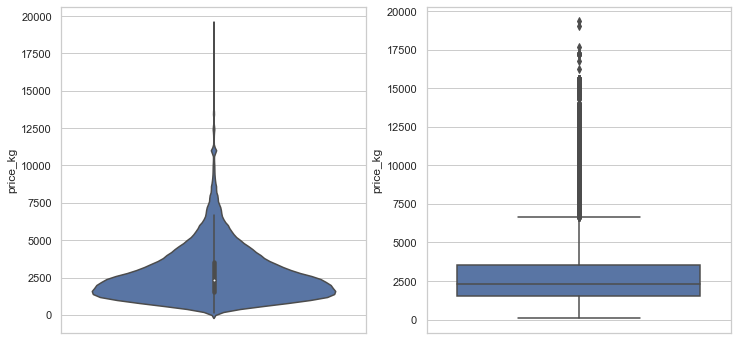

In [83]:
# 분포 재확인
dist(df,prd,'price_kg')

In [74]:
df[df['prd']==prd].describe()

,class,scale,price,price_kg,year,month,week
count,83783.00000,83783.00000,83783.00000,83783.00000,83783.00000,83783.00000,83783.00000
mean,1.54793,82.24250,210184.10966,2450.60016,2020.16986,7.56749,31.12275
std,1.58871,113.62966,358738.26863,1416.60563,1.37343,3.32655,14.52226
min,1.00000,0.10000,500.00000,100.00000,2018.00000,1.00000,1.00000
25%,1.00000,30.00000,46000.00000,1500.00000,2019.00000,5.00000,19.00000
50%,1.00000,50.00000,106000.00000,2193.75000,2020.00000,9.00000,36.00000
75%,1.00000,100.00000,228500.00000,3059.76000,2021.00000,10.00000,43.00000
max,9.00000,4410.00000,16903000.00000,20000.00000,2022.00000,12.00000,53.00000


['AppleGothic']


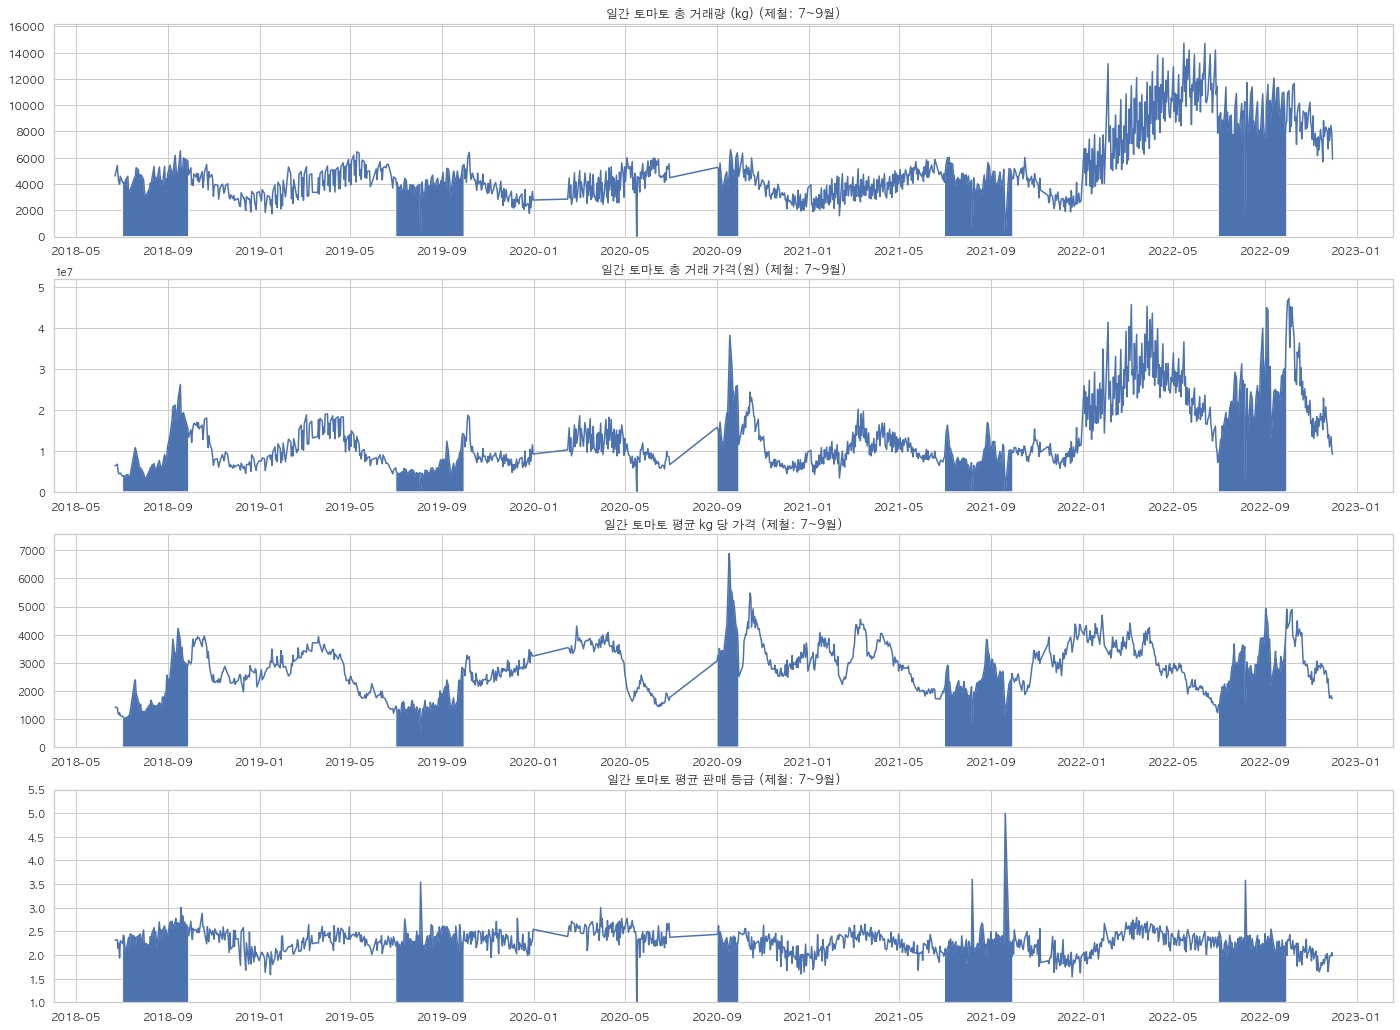

In [84]:
# 전체 분포
prd_info(prd,7,9)

In [109]:
k = df[df['prd']=='오이'].groupby(['month','day']).mean().reset_index()
k

,month,day,class,scale,price,price_kg,year,week
0,1,3,2.04154,123.69911,295394.95549,2138.21392,2020.60237,1.00000
1,1,4,2.09655,96.75448,216472.29885,1935.17529,2020.70805,1.00000
2,1,5,2.09398,109.68985,285104.13534,2439.85741,2021.62782,1.00000
3,1,6,2.09220,104.86950,278598.22695,2509.83699,2021.38652,1.00000
4,1,7,2.07343,92.52959,238306.04752,2338.60955,2020.68251,1.35421
...,...,...,...,...,...,...,...,...
359,12,27,2.05757,74.95224,171008.63539,2057.51561,2019.49467,52.00000
360,12,28,2.10385,73.61826,156165.41039,1900.49598,2019.47906,52.32328
361,12,29,2.11672,71.33186,176107.72871,2278.83852,2020.55205,52.44795
362,12,30,2.12918,79.61626,215672.49443,2334.49871,2019.88196,33.52339


In [132]:
k['date'][1]

'12/31'

In [133]:
for i in range(len(k)):
    k['date'][i] = str(k.iloc[i][0])+'/'+str(k.iloc[i][1])

/var/folders/nq/s4zx76p53d11lnr0t1dxpxh00000gn/T/ipykernel_2123/2266202491.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k['date'][i] = str(k.iloc[i][0])+'/'+str(k.iloc[i][1])


In [134]:
k

,month,day,class,scale,price,price_kg,year,week,date
0,1,3,2.04154,123.69911,295394.95549,2138.21392,2020.60237,1.00000,1/3
1,1,4,2.09655,96.75448,216472.29885,1935.17529,2020.70805,1.00000,1/4
2,1,5,2.09398,109.68985,285104.13534,2439.85741,2021.62782,1.00000,1/5
3,1,6,2.09220,104.86950,278598.22695,2509.83699,2021.38652,1.00000,1/6
4,1,7,2.07343,92.52959,238306.04752,2338.60955,2020.68251,1.35421,1/7
...,...,...,...,...,...,...,...,...,...
359,12,27,2.05757,74.95224,171008.63539,2057.51561,2019.49467,52.00000,12/27
360,12,28,2.10385,73.61826,156165.41039,1900.49598,2019.47906,52.32328,12/28
361,12,29,2.11672,71.33186,176107.72871,2278.83852,2020.55205,52.44795,12/29
362,12,30,2.12918,79.61626,215672.49443,2334.49871,2019.88196,33.52339,12/30


AttributeError: 'list' object has no attribute 'set_xticks'

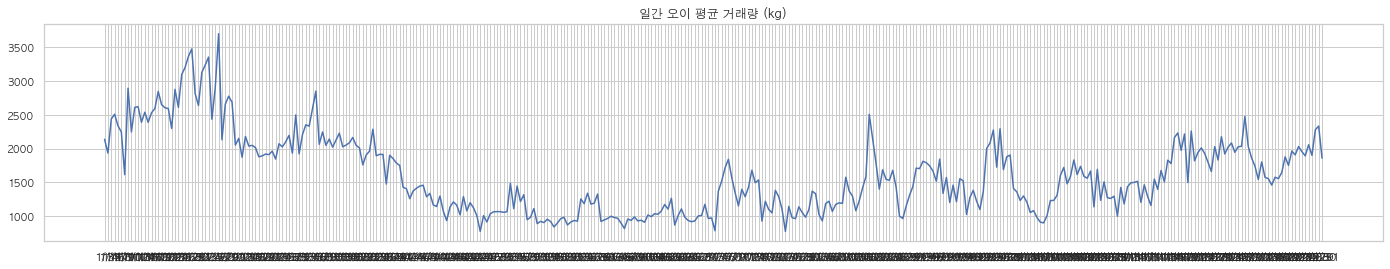

In [139]:
import matplotlib.ticker as ticker


plt.figure(figsize=(24,4),facecolor="white")
plt.rc('font', size=13)
plt.rc('ytick', labelsize=10) 
plt.title(f'일간 오이 평균 거래량 (kg)')
aaa = plt.plot(k['date'],k['price_kg'])
total_len = len(k.index)
aaa.set_xticks(np.arange(0,total_len+1,10))
plt.show()
#plt.fill_between(c['reg_date'],c['total_scale'],where=(c['reg_date'].dt.month>=nums1) & (c['reg_date'].dt.month<=nums2))
#plt.ylim(0,max(c['total_scale'])*1.1)
# ax = plt.gca()
# ax.xaxis.set_major_locator(dates.MonthLocator(interval=4))

## 제철 vs 제철 아닐 때

In [57]:

prd = '오이'
month1, month2= 4,7
df_sn = df[(df['prd']==prd)&(df['reg_date'].dt.month>=month1)&(df['reg_date'].dt.month<=month2)]
df_nsn = df[(df['prd']==prd)&((df['reg_date'].dt.month<month1)|(df['reg_date'].dt.month>month2))]

In [58]:
display('제철')
display(df_sn.describe())
display('제철 외')
display(df_nsn.describe())

'제철'

,scale,price,class,price_kg,year,month,week
count,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000,597500.00000
mean,14.40036,18235.33650,1.48793,1285.33640,2020.73974,5.56233,22.29211
std,4.93656,11821.15680,1.14006,729.81003,1.31607,1.10985,4.96209
min,0.30000,500.00000,1.00000,100.00000,2018.00000,4.00000,13.00000
25%,10.00000,10000.00000,1.00000,800.00000,2020.00000,5.00000,18.00000
50%,15.00000,15500.00000,1.00000,1200.00000,2021.00000,6.00000,23.00000
75%,18.00000,24000.00000,2.00000,1600.00000,2022.00000,7.00000,27.00000
max,200.00000,196000.00000,9.00000,10000.00000,2022.00000,7.00000,31.00000


'제철 외'

,scale,price,class,price_kg,year,month,week
count,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000,873591.00000
mean,14.42279,28601.95761,1.54133,1982.38599,2020.40111,7.50569,30.72454
std,4.38493,18237.24296,1.07866,1096.06751,1.42540,3.65291,15.97221
min,0.20000,500.00000,1.00000,100.00000,2018.00000,1.00000,1.00000
25%,10.00000,15000.00000,1.00000,1200.00000,2019.00000,3.00000,12.00000
50%,18.00000,25000.00000,1.00000,1833.33000,2021.00000,9.00000,36.00000
75%,18.00000,38000.00000,2.00000,2600.00000,2022.00000,10.00000,43.00000
max,211.00000,200000.00000,9.00000,10000.00000,2022.00000,12.00000,53.00000


'information'

count   597500.00000
mean      1285.33640
std        729.81003
min        100.00000
25%        800.00000
50%       1200.00000
75%       1600.00000
max      10000.00000
Name: price_kg, dtype: float64

None

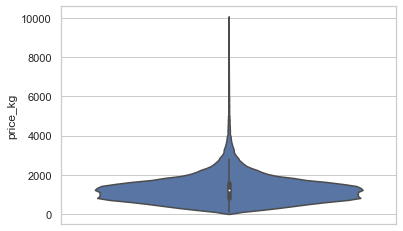

In [66]:
display(dist(df_sn,'오이','price_kg'))

'information'

count   873591.00000
mean      1982.38599
std       1096.06751
min        100.00000
25%       1200.00000
50%       1833.33000
75%       2600.00000
max      10000.00000
Name: price_kg, dtype: float64

None

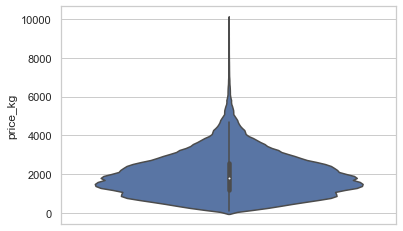

In [67]:
display(dist(df_nsn,'오이','price_kg'))

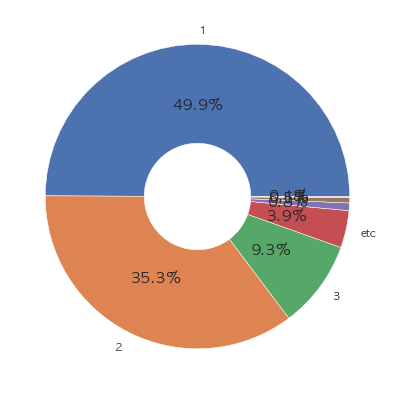

In [68]:
plt.figure(figsize=(7,7),facecolor='white')
plt.rc('font', size=15) 
wedgeprops={'width': 0.65, 'edgecolor': 'w', 'linewidth': 0.5}
class_lst = list(df[df['prd']=='오이']['class'].value_counts().index)
show = class_lst[:3]
show.append('etc')
for _ in range(len(class_lst)-4):
    show.append('')
plt.pie(df[df['prd']=='오이']['class'].value_counts(),labels=show,autopct='%.1f%%',wedgeprops=wedgeprops)
plt.show()

In [ ]:
df[df['prd']=='오이']

In [72]:
# 기간 정하기
# 기간 내 어느 날 어떤 물건을 사는게 가장 싼 지
# 기간 내 특정 품목 평균 가격 및 싸게 사려면 언제 사야할 지
df[df['prd']=='오이'].groupby(['year','week']).sum()

scale      price  class       price_kg  month
year week                                                     
2018 1     14637.60000   22698400   1733  1743885.38000  12888
     25    17798.60000   15250400   1820  1120384.84000   7728
     26    96300.60000   84143500   9752  6139848.83000  41862
     27    95592.60000  106503750   9309  7607351.01000  48258
     28    84913.00000  138588900   8701  9881997.44000  43204
...                ...        ...    ...            ...    ...
2022 44   124246.34000  174754500  13263 11603012.35000  92899
     45   118293.38000  181792900  12216 12089788.61000  86834
     46   124437.59000  213790700  13369 14197198.59000  93082
     47   131586.62000  223216600  14038 14950666.35000  98758
     48    67116.97000  142117400   7170  9717612.24000  51007

[219 rows x 5 columns]

In [ ]:
# 월, 일 합치기